In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [170]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [171]:
#creating a dataset
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['Prices']=housing.target


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Prices      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [173]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [174]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Prices        0
dtype: int64

In [175]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Prices
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Prices,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'Price')

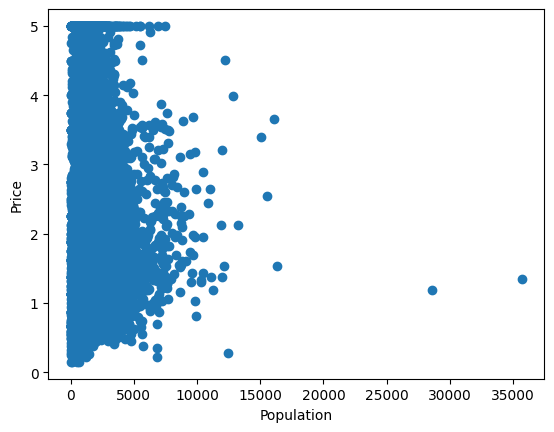

In [176]:
plt.scatter(df['Population'],df['Prices'])
plt.xlabel('Population')
plt.ylabel('Price')


In [177]:
#splitting the data
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
xtrain,xtest,ytrain,ytest=train_test_split(X,y,train_size=0.3,random_state=42)



In [179]:
#standardizing the data set
scaler=StandardScaler()
scaler.fit_transform(xtrain)
scaler.transform(xtest)


array([[-1.14496888, -0.28168168, -0.44258136, ...,  0.1354238 ,
         0.18103584,  0.28980319],
       [-0.70009516,  0.11698643, -0.14867721, ..., -0.05141807,
        -0.24804866,  0.06609704],
       [-0.20356983,  1.87112611, -0.51718492, ..., -0.25726476,
         0.99256524, -1.41533477],
       ...,
       [ 0.67885114, -0.28168168,  0.24915956, ...,  0.05325936,
         0.73604733, -1.10711741],
       [-0.38123672,  0.99405627,  0.077652  , ...,  0.00387929,
         0.32561867, -0.09298288],
       [-0.36527549,  0.99405627,  0.21738245, ..., -0.06225741,
         2.38242592, -2.26541812]])

In [180]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [181]:
#model training
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
pred=linreg.predict(xtest)


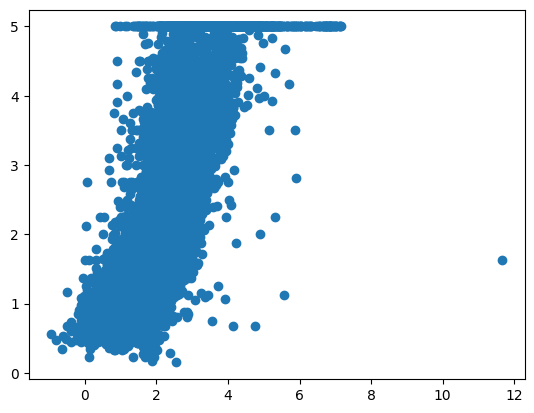

In [182]:
plt.scatter(pred,ytest)


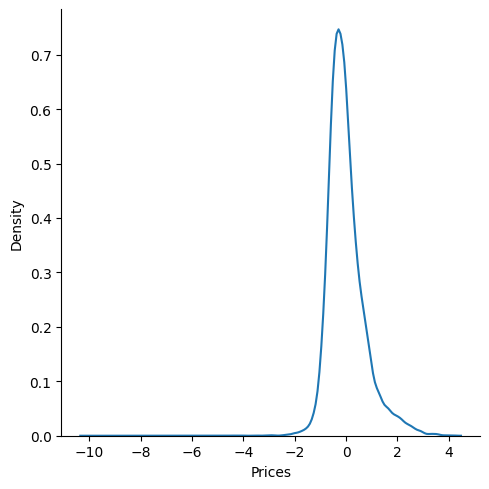

In [183]:
import seaborn as sns
residuals=ytest-pred
sns.displot(residuals,kind='kde')

In [184]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(mean_absolute_error(ytest,pred))
print(mean_squared_error(ytest,pred))
print(np.sqrt(mean_squared_error(ytest,pred)))
score=r2_score(ytest,pred)
print(score)


0.5297046535630124
0.527523651875402
0.7263082347567057
0.6031107469263567


In [185]:
housing.data[0].reshape(1,-1)

linreg.predict(housing.data[1].reshape(1,-1))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.96609523])

In [186]:
import pickle

# Save the scaler object
pickle.dump(scaler, open('scaling.pkl', 'wb'))

# Save the regression model object
pickle.dump(linreg, open('regmodel.pkl', 'wb'))

# Load the scaler object
scaler = pickle.load(open('scaling.pkl', 'rb'))

# Load the regression model object
regmodel = pickle.load(open('regmodel.pkl', 'rb'))

